In [5]:
from pathlib import Path
import re
import joblib
import gmaps
import googlemaps
from dotenv import load_dotenv
import googlemaps
import ast
from functions import con_gps, calc_idx

In [7]:
load_dotenv()
toronto_coord = (43.651070,-79.347015)
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])
maps = googlemaps.Client(key=os.environ['GOOGLE_API_KEY'])
l=4

In [18]:
orig = "Medical Sciences Building, 1 King's College Cir, Toronto, ON M5S 1A8"
dest = "250 College St, Toronto, ON M5T 1R8"

In [19]:
lat1, lng1 = con_gps(orig)
lat2, lng2 = con_gps(dest)
idx, loc = calc_idx(lat1, lng1, lat2, lng2)

In [20]:
lat1, long1

(43.6608871, -79.9202861)

In [21]:
lat2, long2

(43.65926899999999, -79.9257195)

---

In [26]:
df = pd.read_csv('data/assault_lat_long.csv')
locs= list(df.to_records(index=False))

figs = gmaps.figure(center=toronto_coord,zoom_level=10)

heatmap = gmaps.heatmap_layer(locs, point_radius=6, max_intensity=60)
directions = gmaps.directions_layer((loc[0,0],loc[0,1]), (lat2, lng2),travel_mode='WALKING', show_markers=False)

In [27]:
figs.add_layer(heatmap)

In [28]:
figs.add_layer(directions)

In [29]:
figs

Figure(layout=FigureLayout(height='420px'))

---

In [483]:
kept = ['offence', 'Neighbourhood', 'Long', 'Lat']
data = pd.read_csv("data/Assault.csv")
data.head()

/home/aarnphm/.pyenv/versions/3.8.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,premises_type,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.862342e+06,5.424014e+06,40118,GO-2015910621,D23,2015/05/31 15:42:00+00,2015/05/31 15:42:00+00,Apartment,1420,100,Assault With Weapon,2015,May,31,151,Sunday,15,2015.0,May,31.0,151.0,Sunday,15,Assault,1,West Humber-Clairville (1),-79.611774,43.731689,1
1,-8.861463e+06,5.425856e+06,40344,GO-2015928800,D23,2015/06/03 12:38:00+00,2015/06/03 12:39:00+00,Commercial,1420,100,Assault With Weapon,2015,June,3,154,Wednesday,12,2015.0,June,3.0,154.0,Wednesday,12,Assault,1,West Humber-Clairville (1),-79.603876,43.743642,2
2,-8.857188e+06,5.420543e+06,40348,GO-2015929386,D23,2015/05/27 16:00:00+00,2015/06/03 14:11:00+00,Other,1430,100,Assault,2015,June,3,154,Wednesday,14,2015.0,May,27.0,147.0,Wednesday,16,Assault,1,West Humber-Clairville (1),-79.565476,43.709154,3
3,-8.861665e+06,5.423589e+06,40371,GO-2015930623,D23,2015/06/03 17:35:00+00,2015/06/03 17:37:00+00,Outside,1410,100,Aggravated Assault,2015,June,3,154,Wednesday,17,2015.0,June,3.0,154.0,Wednesday,17,Assault,1,West Humber-Clairville (1),-79.605691,43.728929,4
4,-8.861665e+06,5.423589e+06,40372,GO-2015930623,D23,2015/06/03 17:35:00+00,2015/06/03 17:37:00+00,Outside,1420,100,Assault With Weapon,2015,June,3,154,Wednesday,17,2015.0,June,3.0,154.0,Wednesday,17,Assault,1,West Humber-Clairville (1),-79.605691,43.728929,5


In [293]:
data = data[data['occurrenceyear']>=2016]
# data = data[data.offence.str.contains('Assault')]
data = data[~data.offence.str.contains("Weapon")]

In [297]:
finals = data.loc[:, kept]
finals
# finals.offence.unique()

,offence,Neighbourhood,Long,Lat
300,Assault,West Humber-Clairville (1),-79.595527,43.686758
301,Assault,West Humber-Clairville (1),-79.571880,43.693791
302,Assault,West Humber-Clairville (1),-79.592813,43.680815
303,Assault,West Humber-Clairville (1),-79.615810,43.723890
304,Assault Bodily Harm,West Humber-Clairville (1),-79.571472,43.721703
...,...,...,...,...
130353,Assault,NSA,-79.115658,43.819531
130354,Assault,NSA,-79.235481,43.877722
130355,Assault,NSA,-79.656869,43.586366
130356,Assault,NSA,-78.894412,44.170111


In [300]:
fin = finals.loc[finals['offence'].isin(['Assault', 'Aggravated Assault','Assault Bodily Harm','Assault - Resist/ Prevent Seiz','Assault - Force/Thrt/Impede','Crim Negligence Bodily Harm','Unlawfully Causing Bodily Harm'])]
# fin.offence.unique()
# fin.info()

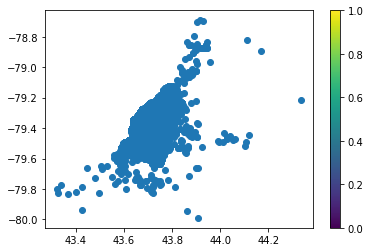

In [301]:
plt.scatter(fin['Lat'], fin['Long'])
plt.colorbar()
plt.show()

In [302]:
latlong = fin[['Lat', 'Long']]

In [303]:
latlong.to_csv("data/assault_lat_long.csv", index=False, header=False)

---

In [304]:
from pyspark import SparkContext
sc = SparkContext()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at /tmp/ipykernel_145452/414631668.py:2 

In [305]:
from pyspark.mllib.clustering import GaussianMixture

In [306]:
data = sc.textFile("./data/assault_lat_long.csv")

In [375]:
parsed = data.map(lambda line: np.array([float(x) for x in line.strip().split(',')]))

In [376]:
gmm = GaussianMixture.train(parsed, l)

In [377]:
with open(f"./metadata/gmm.txt", 'w') as f:
    for j in range(0,l):
        f.write(str(gmm.weights[j])+"\n")
        f.write(str(gmm.gaussians[j].mu) + "\n")
        f.write(str(gmm.gaussians[j].sigma.toArray())+'\n')

In [378]:
!cat ./metadata/gmm.txt

0.27906506942267223
[43.656121947463966,-79.386989240487]
[[0.00014319 0.00011612]
 [0.00011612 0.00055747]]
0.2703079633836375
[43.68248652410987,-79.47593410320772]
[[0.00190582 0.00065165]
 [0.00065165 0.00312071]]
0.19654576416017433
[43.76825469338819,-79.42761895206436]
[[0.0007647  0.00260243]
 [0.00260243 0.0140082 ]]
0.25408120303351583
[43.73144284046345,-79.2684335787133]
[[0.00153575 0.00160843]
 [0.00160843 0.00299422]]


In [383]:
for j in range(0,l):
    with open(f"./models/gmm_{j}.txt", 'w') as f:
        f.write(f"{str(gmm.weights[j])}\n")
        f.write(f"{str(gmm.gaussians[j].mu)}\n")
        f.write(f"{str(gmm.gaussians[j].sigma.toArray())}\n")

In [384]:
!cat ./models/gmm_3.txt

0.25408120303351583
[43.73144284046345,-79.2684335787133]
[[0.00153575 0.00160843]
 [0.00160843 0.00299422]]


In [385]:
! ls ./models

gmm_0.txt  gmm_1.txt  gmm_2.txt  gmm_3.txt
